In [1]:
import os, types
import pandas as pd

import numpy as np
hack_df = pd.read_csv('train.csv')
#hack_df.head(10)
test_df = pd.read_csv('test.csv')
#test_df.head(10)

In [2]:
test_df['year_built'] = test_df['year_built'].replace(np.nan, 2022)
#replacing rest of the values with mean
test_df['energy_star_rating'] = test_df['energy_star_rating'].replace(np.nan, test_df['energy_star_rating'].mean())
test_df['direction_max_wind_speed'] = test_df['direction_max_wind_speed'].replace(np.nan, test_df['direction_max_wind_speed'].mean())
test_df['direction_peak_wind_speed'] = test_df['direction_peak_wind_speed'].replace(np.nan, test_df['direction_peak_wind_speed'].mean())
test_df['max_wind_speed'] = test_df['max_wind_speed'].replace(np.nan, test_df['max_wind_speed'].mean())
test_df['days_with_fog'] = test_df['days_with_fog'].replace(np.nan, test_df['days_with_fog'].mean())
#hack_df.iloc[:,3:64]
x_test = test_df.iloc[:,4:62]
print(x_test)
y_test = test_df.iloc[:,62]
#print(y_test)
#print(x.head(10))

      floor_area  year_built  energy_star_rating  ELEVATION  january_min_temp  \
0        28484.0      1994.0                37.0        2.4                38   
1        21906.0      1961.0                55.0       45.7                38   
2        16138.0      1950.0                 1.0       59.1                38   
3        97422.0      1971.0                34.0       35.4                38   
4        61242.0      1942.0                35.0        1.8                38   
...          ...         ...                 ...        ...               ...   
9700    305925.0      2013.0                99.0      812.0                21   
9701     34909.0      1910.0                94.0       26.5                21   
9702     42393.0      2014.0                94.0      812.0                21   
9703     25368.0      1992.0                79.0      812.0                21   
9704     45640.0      1994.0                87.0       26.5                21   

      january_avg_temp  jan

In [3]:
hack_df['year_built'] = hack_df['year_built'].replace(np.nan, 2022)
#replacing rest of the values with mean
hack_df['energy_star_rating'] = hack_df['energy_star_rating'].replace(np.nan, hack_df['energy_star_rating'].mean())
hack_df['direction_max_wind_speed'] = hack_df['direction_max_wind_speed'].replace(np.nan, hack_df['direction_max_wind_speed'].mean())
hack_df['direction_peak_wind_speed'] = hack_df['direction_peak_wind_speed'].replace(np.nan, hack_df['direction_peak_wind_speed'].mean())
hack_df['max_wind_speed'] = hack_df['max_wind_speed'].replace(np.nan, hack_df['max_wind_speed'].mean())
hack_df['days_with_fog'] = hack_df['days_with_fog'].replace(np.nan, hack_df['days_with_fog'].mean())
#hack_df.iloc[:,3:64]
x_train = hack_df.iloc[:,4:62]
#x_train.drop(['days_above_110F'], axis=1, inplace=True)
#x_train.drop(['days_below_0F'], axis=1, inplace=True)
#print(x_train)
y_train = hack_df.iloc[:None,62]
print(y_train)
#print(x.head(10))

0        248.682615
1         26.500150
2         24.693619
3         48.406926
4          3.899395
            ...    
75752    132.918411
75753     39.483672
75754     48.404398
75755    592.022750
75756     29.154684
Name: site_eui, Length: 75757, dtype: float64


In [4]:
#from sklearn.model_selection import train_test_split

#x_training, x_testing, y_training, y_testing = train_test_split(x, y, test_size=0.2, random_state=42)


In [5]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
#lr.fit(x_train,y_train)
#lr2 = LinearRegression()
#lr2.fit(x_test,y_test)


In [6]:
#y_lr_train_predicted = lr.predict(x_test)
#y_lr_test_predicted = lr.predict(x_test)

In [7]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#lr_train_mse = mean_squared_error(y_train, y_lr_train_predicted)#mse used to show that the mse performance metric is used

#lr_train_r2 = r2_score(y_train, y_lr_train_predicted)#r2 used to show that the r2 performance metric is used

#lr_test_mse = mean_squared_error(y_test, y_lr_test_predicted)
#lr_test_r2 = r2_score(y_test, y_lr_test_predicted)
#print(lr_train_mse)
#print(lr_train_r2)

#lr_results = pd.DataFrame(['Linear regression',lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
#lr_results = pd.DataFrame(['Linear regression',lr_train_mse, lr_train_r2]).transpose()
#lr_results.columns = ['Method','Training MSE','Training R2','Test MSE','Test R2']
#lr_results.columns = ['Method','Training MSE','Training R2']
#print(lr_results)

In [8]:
from sklearn.ensemble import GradientBoostingRegressor
rf = GradientBoostingRegressor(max_depth = 2, random_state = 39)
print(y_train)
rf.fit(x_train,y_train)
#rf2 = GradientBoostingRegressor(max_depth = 4, random_state = 42)
#rf2.fit(x_test,y_test)

0        248.682615
1         26.500150
2         24.693619
3         48.406926
4          3.899395
            ...    
75752    132.918411
75753     39.483672
75754     48.404398
75755    592.022750
75756     29.154684
Name: site_eui, Length: 75757, dtype: float64


GradientBoostingRegressor(max_depth=2, random_state=39)

In [9]:
y_rf_train_predicted = rf.predict(x_test)
#y_rf_test_predicted = rf.predict(x_test)
print(y_rf_train_predicted)
#print(y_train)

[ 91.65626528  71.49484244 194.13312951 ...  48.59906458  62.91454616
  57.68949054]


In [10]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#rf_train_mse = mean_squared_error(y_train, y_rf_train_predicted)
#rf_train_r2 = r2_score(y_train, y_rf_train_predicted)
y_train = range(len(y_rf_train_predicted))
rf_train_mse = mean_squared_error(y_train, y_rf_train_predicted)
rf_train_r2 = r2_score(y_train, y_rf_train_predicted)
#rf_results = pd.DataFrame(['Random Forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results = pd.DataFrame(['Random Forest', rf_train_mse, rf_train_r2]).transpose()
rf_results.columns = ['Method', 'train_mse', 'train_r2']
print(rf_results)

          Method        train_mse  train_r2
0  Random Forest  30681687.585769 -2.909034


In [11]:
#pd.concat([lr_results, rf_results], axis=0)


Text(0.5, 0, 'Actual')

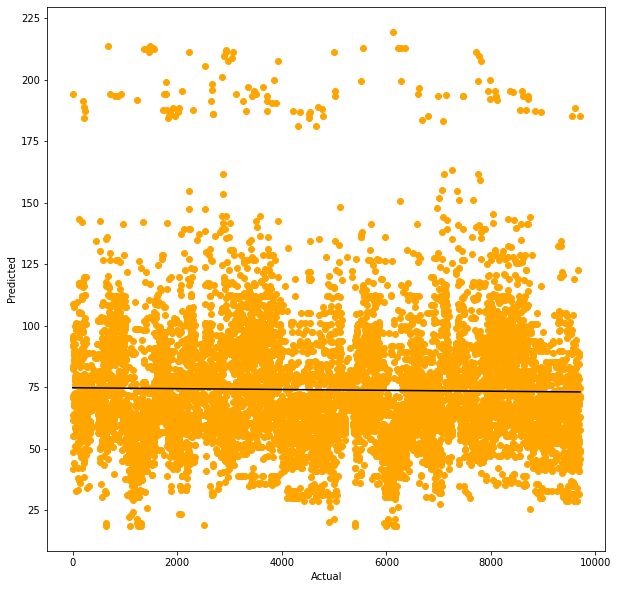

In [12]:
import matplotlib.pyplot as plt

x = y_train
x = range(len(y_rf_train_predicted))
plt.figure(figsize=(10,10))

plt.scatter(x, y = y_rf_train_predicted, color='orange', alpha = 1)
y_train = range(len(y_rf_train_predicted))
z = np.polyfit(x, y_rf_train_predicted, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), "black")
plt.ylabel('Predicted')
plt.xlabel('Actual')


In [13]:
X = hack_df.iloc[:,1]
X = range(len(y_rf_train_predicted))
y_train = range(len(y_rf_train_predicted))
actual = y_train
difference = actual - y_rf_train_predicted

X_axis = np.arange(len(X))
plt.figure(figsize=(10,10))
plt.bar(X_axis, actual, color='b', alpha=0.5, label='Actual values')
plt.bar(X_axis, difference, color='r', alpha=0.5, label='Difference between values')

plt.xticks(X_axis, X)
#plt.xlabel('ID')
plt.ylabel('EUI values')
plt.title('Actual vs Predicted values')
plt.legend()
plt.show()
